In [402]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [199]:
try:
    import google.colab 
    In_colab=True
except:
    In_colab=False

if(In_colab):
    print("running in google colab")
    from google.colab import drive 
    drive.mount('/content/drive')
    df = pd.read_csv('drive/My Drive/Colab Notebooks/Stock Price Prediction RNN/SBIN.csv')

else :
    print("Running in local system")
    path=r"C:\Users\SHRISTI\OneDrive\Desktop\GitHub\Stock-Price-Prediction"
    df=pd.read_csv(r"C:\Users\SHRISTI\OneDrive\Desktop\GitHub\Stock-Price-Prediction\Data\SBIN.csv")


Running in local system


In [201]:
# Load the dataset
#df = pd.read_csv('/content/SBIN.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-1996,18.691147,18.978922,18.540184,18.823240,12.409931,43733533.0
1,02-01-1996,18.894005,18.964767,17.738192,18.224106,12.014931,56167280.0
2,03-01-1996,18.327892,18.568489,17.643839,17.738192,11.694577,68296318.0
3,04-01-1996,17.502312,17.832542,17.223972,17.676863,11.654142,86073880.0
4,05-01-1996,17.738192,17.785366,17.459852,17.577793,11.588827,76613039.0


In [203]:
# Drop the 'Date' and 'Adj Close' columns
df.drop(['Date', 'Adj Close'], axis=1, inplace=True)

In [205]:
df.head()

,Open,High,Low,Close,Volume
0,18.691147,18.978922,18.540184,18.823240,43733533.0
1,18.894005,18.964767,17.738192,18.224106,56167280.0
2,18.327892,18.568489,17.643839,17.738192,68296318.0
3,17.502312,17.832542,17.223972,17.676863,86073880.0
4,17.738192,17.785366,17.459852,17.577793,76613039.0


In [207]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [209]:
# Select features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [211]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [215]:
X_train.shape

(5659, 4)

In [217]:
X_test.shape

(1415, 4)

In [219]:
y_train.shape

(5659,)

In [221]:
y_test.shape

(1415,)

In [223]:
# Function to evaluate and print RMSE, MAE, and MAPE
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}\n")
    
    return rmse, mae, mape


In [225]:
metrics = {
    "Model": [],
    "RMSE": [],
    "MAE": [],
    "MAPE": []
}

## 1. LINEAR REGRESSION

In [228]:
# Create a linear regression model
model1 = LinearRegression()

In [230]:
y_train.head()

5286    257.350006
3408    129.464996
5477    279.350006
6906    588.500000
530      21.644367
Name: Close, dtype: float64

In [232]:
# Train the model
model1.fit(X_train_scaled, y_train)

LinearRegression()

In [234]:
rmse, mae, mape = evaluate_model(model1, X_test_scaled, y_test)
metrics["Model"].append("Linear Regressor")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 1.6881364651923558
MAE: 0.9433353486266928
MAPE: 0.006085435968276741



## 2. SVR

In [237]:
# Create an SVR model
model2 = SVR()

In [239]:
# Train the model
model2.fit(X_train_scaled, y_train)

SVR()

In [240]:
rmse, mae, mape = evaluate_model(model2, X_test_scaled, y_test)
metrics["Model"].append("SVR")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 17.574809673127547
MAE: 6.278157692070486
MAPE: 0.09040265035344064



## 3. Random Forest

In [244]:
model3=RandomForestRegressor()

In [246]:
# Train the model
model3.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [248]:
rmse, mae, mape = evaluate_model(model3, X_test_scaled, y_test)
metrics["Model"].append("Random Forest")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 2.1986854099848796
MAE: 1.2590709832792741
MAPE: 0.00801266233665469



## 4. Gradient Boosting Models (GBM)

In [251]:
model4 = GradientBoostingRegressor()

In [253]:
# Train the model
model4.fit(X_train_scaled, y_train)

GradientBoostingRegressor()

In [255]:
rmse, mae, mape = evaluate_model(model4, X_test_scaled, y_test)
metrics["Model"].append("GBM")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 2.6992241814724083
MAE: 1.6925175900091436
MAPE: 0.011872407861594362



## 5. Extreme Gradient Boosting (XGBoost)

In [258]:
import xgboost as xgb
# Create an XGBoost model
model5 = xgb.XGBRegressor()

In [260]:
# Train the model
model5.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [262]:
rmse, mae, mape = evaluate_model(model5, X_test_scaled, y_test)
metrics["Model"].append("XGBoost")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 2.733930065274145
MAE: 1.502457380471909
MAPE: 0.010026410639661481



## 6. AdaBoostRegressor

In [265]:
model6 = AdaBoostRegressor()

In [267]:
# Train the model
model6.fit(X_train_scaled, y_train)

AdaBoostRegressor()

In [269]:
rmse, mae, mape = evaluate_model(model6, X_test_scaled, y_test)
metrics["Model"].append("AdaBoost Regressor")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 9.905780162115684
MAE: 8.2344099731735
MAPE: 0.18109323861805623



## 7. Decision Tree

In [272]:
model7 = DecisionTreeRegressor()

In [274]:
# Train the model
model7.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [276]:
rmse, mae, mape = evaluate_model(model7, X_test_scaled, y_test)
metrics["Model"].append("Decision Tree")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 3.047519984221783
MAE: 1.6449295177848302
MAPE: 0.01032495938605914



## 8. KNeighborsRegressor(KNN)

In [279]:
# Create a KNN model
model8 = KNeighborsRegressor()

In [281]:
# Train the model
model8.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [283]:
rmse, mae, mape = evaluate_model(model8, X_test_scaled, y_test)
metrics["Model"].append("KNN")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 3.0274590148039873
MAE: 1.7525904376439672
MAPE: 0.013668115353592272



## 9. Artificial Neural Networks (ANN)

In [298]:
# Create an ANN model
model9 = Sequential()
model9.add(Dense(32, activation='relu',input_shape=(X_train.shape[1],)))
model9.add(Dense(16, activation='relu'))
model9.add(Dense(1, activation='linear'))

D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [300]:
# Compile the model
model9.compile(loss='mean_squared_error', optimizer='adam')

In [302]:
# Train the model
model9.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

In [304]:
rmse, mae, mape = evaluate_model(model9, X_test_scaled, y_test)
metrics["Model"].append("ANN")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE: 2.7931731760173064
MAE: 1.7679335613673242
MAPE: 0.012136252896684767



## 10. LSTM(Long Short term Memory)

In [ ]:
# Reshape the input data for LSTM
n_features = X_train_scaled.shape[1]
n_steps = 10
n_samples_train = X_train_scaled.shape[0] - n_steps + 1
n_samples_test = X_test_scaled.shape[0] - n_steps + 1

# Reshape the input data
X_train_reshaped = np.array([X_train_scaled[i:i+n_steps, :] for i in range(n_samples_train)])
X_test_reshaped = np.array([X_test_scaled[i:i+n_steps, :] for i in range(n_samples_test)])

In [383]:
# Create an LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [385]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


In [387]:
# Train the model
model.fit(X_train_reshaped, y_train[n_steps-1:], epochs=100, batch_size=32, verbose=0)

In [ ]:
rmse, mae, mape = evaluate_model(model10, X_test_reshaped, y_test)
metrics["Model"].append("LSTM")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

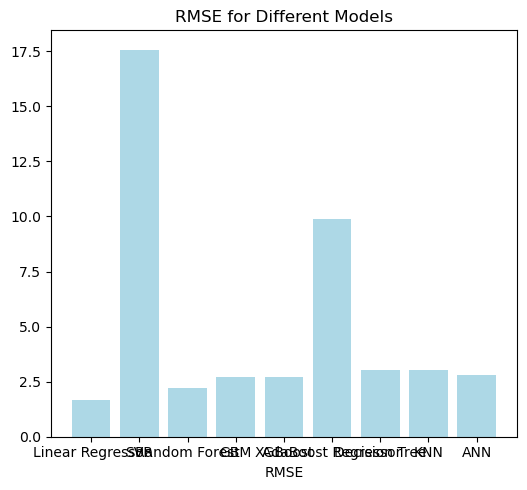

In [392]:
# Create a DataFrame for metrics
metrics_df = pd.DataFrame(metrics)

# Plot RMSE, MAE, and MAPE for each model
plt.figure(figsize=(15, 5))

# RMSE Plot
plt.subplot(1, 3, 1)
plt.bar(metrics_df['Model'], metrics_df['RMSE'], color='lightblue')
plt.xlabel('RMSE')
plt.title('RMSE for Different Models')
plt.tight_layout()
plt.show()

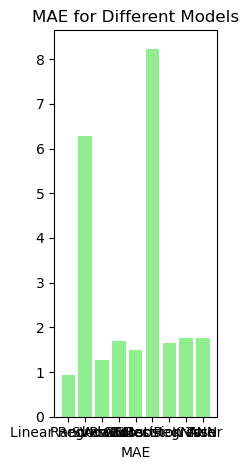

In [394]:
# MAE Plot
plt.subplot(1, 3, 2)
plt.bar(metrics_df['Model'], metrics_df['MAE'], color='lightgreen')
plt.xlabel('MAE')
plt.title('MAE for Different Models')
plt.tight_layout()
plt.show()

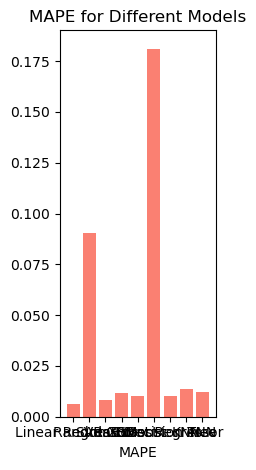

In [372]:
# MAPE Plot
plt.subplot(1, 3, 3)
plt.bar(metrics_df['Model'], metrics_df['MAPE'], color='salmon')
plt.xlabel('MAPE')
plt.title('MAPE for Different Models')
plt.tight_layout()
plt.show()

# Using of LightGBM and CatBoost For Optimizing the model accuracy and time complexity

In [375]:
# Import necessary libraries
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mae = mean_absolute_error(y_test, pred)
    mape = mean_absolute_percentage_error(y_test, pred)
    accuracy = accuracy_score(y_test > pred, y_test > pred.round())
    precision = precision_score(y_test > pred, y_test > pred.round())
    confusion = confusion_matrix(y_test > pred, y_test > pred.round())
    recall = recall_score(y_test > pred, y_test > pred.round())
    f1 = f1_score(y_test > pred, y_test > pred.round())
    return rmse, mae, mape, accuracy, precision, confusion, recall, f1

# Train and evaluate LightGBM model for from this directly print accuracy 
model_lightgbm = lgb.LGBMRegressor()
metrics_lightgbm = train_and_evaluate_model(model_lightgbm, X_train, X_test, y_train, y_test)
print("LightGBM Metrics:", metrics_lightgbm)

# Train and evaluate CatBoost model
model_catboost = CatBoostRegressor(verbose=0)
metrics_catboost = train_and_evaluate_model(model_catboost, X_train, X_test, y_train, y_test)
print("CatBoost Metrics:", metrics_catboost)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 5659, number of used features: 4
[LightGBM] [Info] Start training from score 181.385070
LightGBM Metrics: (2.5004678527479367, 1.4593112955917007, 0.009870401910502258, 0.896113074204947, 0.8892086330935252, array([[650,  77],
       [ 70, 618]], dtype=int64), 0.8982558139534884, 0.8937093275488069)
CatBoost Metrics: (2.820023475303284, 1.694133282525543, 0.012356791551784154, 0.8989399293286219, 0.9116809116809117, array([[632,  62],
       [ 81, 640]], dtype=int64), 0.8876560332871013, 0.8995080815179198)
